# 🏙️ NYC Airbnb Analysis

Exploratory Data Analysis (EDA) of Airbnb listings in New York City.  
The goal is to uncover trends in pricing, availability, and location patterns across boroughs and property types.

**Dataset:** [New York City Airbnb Open Data (Kaggle)](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)  
**Objective:**  
- Understand the distribution of listings across neighborhoods and property types  
- Analyze pricing trends and availability  
- Identify factors that may influence rental prices and occupancy

This project follows the **standard EDA structure** starting from data loading and cleaning, then moving to feature exploration and visualization.

## 1. Import & Setup

In this section, we set up the analysis environment. This includes importing the core Python libraries for data manipulation and visualization, as well as configuring global plotting styles for consistent and readable outputs.

### 1.1 Import Libraries

We import the following key libraries:
* **Pandas & NumPy:** For data structures and numerical operations.
* **Matplotlib & Seaborn:** For static data visualization.
* **Plotly Express:** For interactive and high-level plotting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1.2 Visualization Settings

Here, we configure the global settings for our plots. We set a default figure size and font sizes to ensure all visualizations are clear and legible throughout the notebook.

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

## 2. Data Overview

In this section, we load the Airbnb NYC dataset and inspect its fundamental structure.
Our goals are to:
* Load the raw CSV data and optimize it by saving/loading as Parquet.
* Understand the dataset's dimensions (rows and columns).
* Inspect data types and identify missing values.
* Examine basic statistical summaries to spot potential outliers or data quality issues.

### 2.1 Load Data

We load the raw CSV file. To improve performance for future steps, we also convert and save the data in **Parquet** format, which is faster and more efficient for storage. We then load the Parquet file for analysis.

In [3]:
# Load raw CSV
df = pd.read_csv("../data/AB_NYC_2019.csv")

# Save as Parquet for efficiency
parquet_path = "../data/AB_NYC_2019.parquet"
df.to_parquet(parquet_path, index=False)
print(f"✔ Parquet file successfully saved to: {parquet_path}")

# Reload from Parquet to confirm and use for analysis
data = pd.read_parquet(parquet_path)

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
display(data.head())

✔ Parquet file successfully saved to: ../data/AB_NYC_2019.parquet

First 5 rows of the dataset:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 2.2 Structure & Data Quality

We inspect the dataframe's shape, data types, and check for null values. This step is crucial for identifying columns that may require cleaning or imputation.

In [4]:
print(f"Dataset Shape: {data.shape[0]} rows, {data.shape[1]} columns")

print("\n--- Data Info ---")
data.info()

print("\n--- Missing Values Count ---")
print(data.isna().sum())

Dataset Shape: 48895 rows, 16 columns

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               4889

### 2.3 Statistical Summary

We generate summary statistics for both numerical and categorical features. This helps us spot:
* **Outliers** in numerical data (e.g., extreme prices or minimum nights).
* **Top categories** in categorical data (e.g., most common neighbourhood or room type).

In [5]:
print("\n--- Summary Statistics (All Columns) ---")
display(data.describe(include='all'))


--- Summary Statistics (All Columns) ---


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### 2.4 Column Name Validation

We verify that all column names are consistent (no spaces or special characters) to ensure easy programmatic access throughout the analysis.

In [6]:
print("Column Names List:")
print(list(data.columns))

print("\nChecking for spaces or inconsistencies:")
issues = False
for col in data.columns:
    if " " in col:
        print(f"⚠️ Column '{col}' contains a space!")
        issues = True

if not issues:
    print("✔ All column names are clean and consistent (snake_case).")

Column Names List:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Checking for spaces or inconsistencies:
✔ All column names are clean and consistent (snake_case).


### 2.5 Observations from Overview

**Key Findings:**
* **Structure:** The dataset contains **48,895 rows** and **16 columns**. All columns loaded correctly with appropriate data types.
* **Missing Data:**
    * `name` and `host_name` have negligible missing values (<25 rows) and can likely be ignored.
    * `last_review` and `reviews_per_month` are missing for ~10,000 rows (~20%). This logically indicates listings that have **never received a review**. We should handle these carefully (e.g., fill `reviews_per_month` with 0).
* **Outliers:** The `price` column shows a minimum of **0** (which is invalid) and a maximum of **$10,000**, indicating significant outliers. `minimum_nights` also has a max of 1,250, which warrants investigation.
* **Categorical Data:** **Manhattan** is the most frequent neighbourhood group, and **Entire home/apt** is the most common room type.

## 3. Data Cleaning

In this section, we address data quality issues to prepare the dataset for analysis.
Our primary goals are to:
* **Handle Missing Values:** We will fill missing text fields with placeholders and numeric fields with appropriate defaults (e.g., 0 for reviews).
* **Fix Data Types:** We will convert date columns like `last_review` to the correct datetime format.
* **Filter Outliers:** We will remove listings with invalid prices ($0) or extreme outliers to ensure robust analysis.

### 3.1 Cleaning & Fixes

We apply specific fixes to the columns with missing data:
1.  **Name & Host Name:** Fill missing values with "Unknown".
2.  **Reviews:** If `reviews_per_month` is missing, it implies 0 reviews. We fill it with 0.
3.  **Dates:** We convert `last_review` to datetime objects. Any errors (missing values) will be handled by coercion (becoming NaT).

In [7]:
# 1. Fill text-based missing values
data['name'] = data['name'].fillna("Unknown")
data['host_name'] = data['host_name'].fillna("Unknown")

# 2. Handle review-related missing values
# Listings with no reviews: reviews_per_month = 0
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

# Convert last_review to datetime; missing/invalid values become NaT
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# 3. Confirm fix
print("Missing values after filling:")
print(data.isna().sum())

Missing values after filling:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### 3.2 Handling Outliers & Filtering

The statistical summary revealed some anomalies. To ensure our analysis reflects the typical market:
* **Price:** We remove listings with a price of **$0** (invalid) and cap extremely high outliers at **$1,000**.
* **Minimum Nights:** We restrict the analysis to listings requiring **365 nights or less** (1 year), excluding extreme long-term requirements.

In [8]:
# 1. Filter Price
# Remove free listings (price = 0) and extreme luxury outliers (> $1000)
data = data[(data['price'] > 0) & (data['price'] < 1000)]

# 2. Filter Minimum Nights
# Restrict to listings with minimum nights <= 365
data = data[data['minimum_nights'] <= 365]

print("✔ Outliers removed.")
print(f"New Dataset Shape: {data.shape[0]} rows, {data.shape[1]} columns")

# Save cleaned CSV
data.to_csv("../data/nyc_airbnb_cleaned.csv", index=False)

# Save cleaned Parquet
data.to_parquet("../data/nyc_airbnb_cleaned.parquet", index=False)

✔ Outliers removed.
New Dataset Shape: 48572 rows, 16 columns


### 3.3 Final Data Check

We perform a final verification of the cleaned dataframe to ensure it is ready for exploration.

In [9]:
print("--- Cleaned Data Info ---")
data.info()

print("\n--- Cleaned Summary Statistics ---")
display(data.describe())

--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 48572 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48572 non-null  int64         
 1   name                            48572 non-null  object        
 2   host_id                         48572 non-null  int64         
 3   host_name                       48572 non-null  object        
 4   neighbourhood_group             48572 non-null  object        
 5   neighbourhood                   48572 non-null  object        
 6   latitude                        48572 non-null  float64       
 7   longitude                       48572 non-null  float64       
 8   room_type                       48572 non-null  object        
 9   price                           48572 non-null  int64         
 10  minimum_nights                  48572 non-null  i

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.857200e+04,4.857200e+04,48572.000000,48572.000000,48572.000000,48572.000000,48572.000000,38690,48572.000000,48572.000000,48572.000000
mean,1.902306e+07,6.764521e+07,40.728927,-73.952028,140.269826,6.784176,23.378016,2018-10-04 15:19:20.672008192,1.095586,7.170345,112.314440
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.476845e+06,7.831209e+06,40.690000,-73.982950,69.000000,1.000000,1.000000,2018-07-10 00:00:00,0.040000,1.000000,0.000000
50%,1.967743e+07,3.085513e+07,40.722960,-73.955580,105.000000,3.000000,5.000000,2019-05-19 00:00:00,0.380000,1.000000,44.000000
75%,2.914961e+07,1.074344e+08,40.763130,-73.936100,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.600000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,999.000000,365.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.097852e+07,7.861058e+07,0.054582,0.046160,112.904535,16.129464,44.656757,NaN,1.600025,33.050706,131.352383


## 4. Feature Engineering

In this section, we create new features from existing data to uncover deeper insights.
* **Review Recency:** We calculate the number of days since the last review to verify if a listing is currently active.
* **Host Activity:** We categorize hosts based on their listing count to distinguish between individual owners and professional property managers.

### 4.1 Review Recency

We calculate `review_recency` as the number of days between the dataset's latest review date and the listing's `last_review`.
* **Goal:** To measure how "stale" or "fresh" a listing is.
* **Handling Missing:** Listings with no reviews are assigned a value of **-1** to differentiate them from active listings.

In [10]:
# Calculate days since last review
reference_date = data['last_review'].max()
data['review_recency'] = (reference_date - data['last_review']).dt.days

# For listings with no reviews (NaT), fill with 0 (or -1 if preferred to distinguish)
data['review_recency'] = data['review_recency'].fillna(0).astype("Int64")

# Quick check
print(data[['last_review', 'review_recency']].head())

# Check distribution
print("\n Review Recency Distribution:")
print(data['review_recency'].describe())

  last_review  review_recency
0  2018-10-19             262
1  2019-05-21              48
2         NaT               0
3  2019-07-05               3
4  2018-11-19             231

 Review Recency Distribution:
count       48572.0
mean     220.135654
std      385.446757
min             0.0
25%             4.0
50%            25.0
75%           246.0
max          3024.0
Name: review_recency, dtype: Float64


### 4.2 Host Activity Classification

We create a binary feature `is_super_active_host` to identify professional hosts.
* **Logic:** If a host manages **5 or more listings**, they are flagged as "super active" (1). Otherwise, they are considered standard hosts (0).
* **Goal:** To see if professional management correlates with higher prices or availability later in our analysis.

In [11]:
# Flag hosts with 5+ listings
data['is_super_active_host'] = (data['calculated_host_listings_count'] >= 5).astype(int)

# Check first rows
print("Host Activity Preview:")
data[['calculated_host_listings_count', 'is_super_active_host']].head()

Host Activity Preview:


,calculated_host_listings_count,is_super_active_host
0,6,1
1,2,0
2,1,0
3,1,0
4,1,0


### Summary of Feature Engineering

Two new columns were created to improve analysis.  
`review_recency` measures how many days have passed since the last review.  
Listings with no reviews get a value of 0.  

`is_super_active_host` flags hosts that manage 5 or more listings.  
This helps identify commercial operators compared to single–property hosts.

## 5. Univariate Analysis

In this section, we examine the distribution of individual variables to understand their characteristics, spread, and potential outliers. We will look at:
- Price
- Location (Neighbourhood Groups)
- Room Types
- Review Counts
- Availability
- Minimum Nights

### 5.1 Distribution of Price

First, we visualize the distribution of prices. Since price is highly skewed with some extreme outliers, we visualize a subset (listings under $1,000) to clearly see the most common price points.

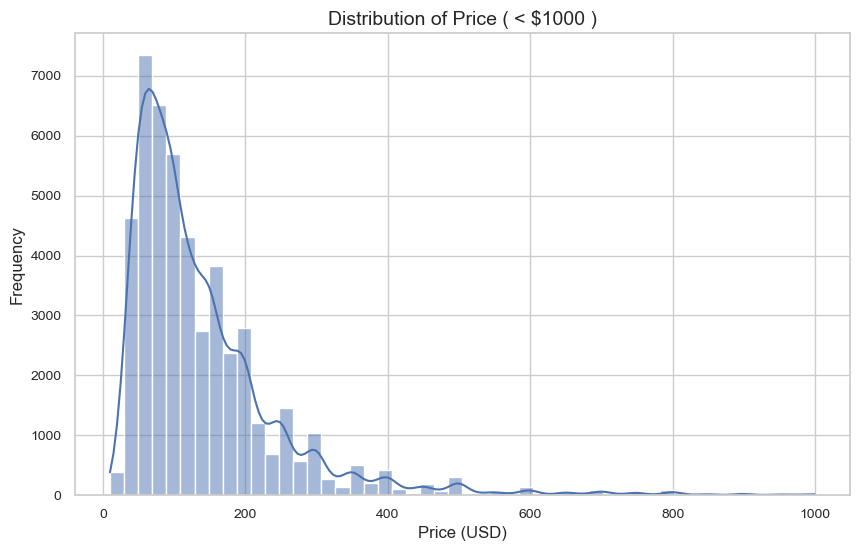

In [12]:
# Filtering for price < 1000 just for this visualization to make it readable
# kde=True adds a smooth line to show the distribution shape
sns.histplot(data[data['price'] < 1000]['price'], bins=50, kde=True)

plt.title('Distribution of Price ( < $1000 )')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

# Save the plot
plt.savefig('../figures/price_distribution_univariate.png')
plt.show()

### 5.2 Distribution by Neighbourhood Group

Which boroughs have the most listings? This count plot helps us understand the geographical spread of Airbnb options in NYC.

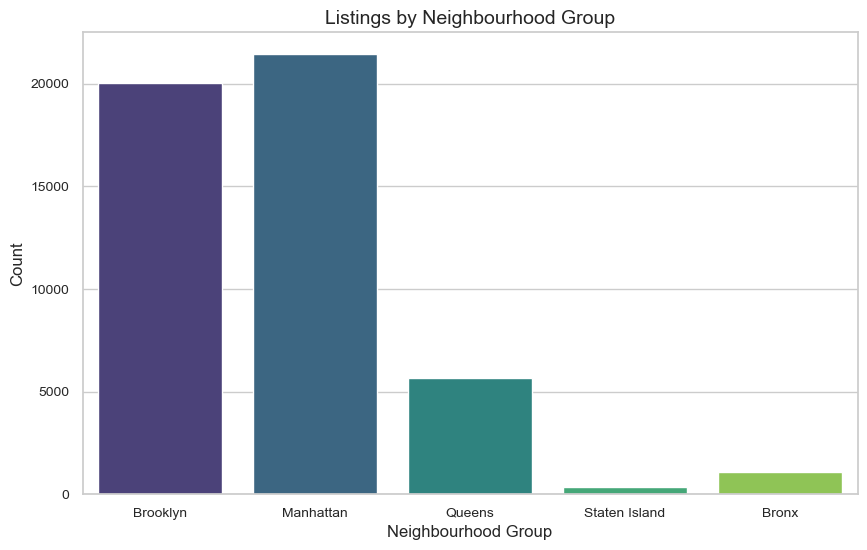

In [13]:
# countplot automatically counts observations in each category
sns.countplot(
    data=data, 
    x='neighbourhood_group',
    hue='neighbourhood_group',
    palette='viridis'
)

plt.title('Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')

# Save the plot
plt.savefig('../figures/neighbourhood_group_distribution.png')
plt.show()

### 5.3 Distribution of Room Types

We examine the types of accommodation available (Entire home, Private room, Shared room) to understand the market composition.

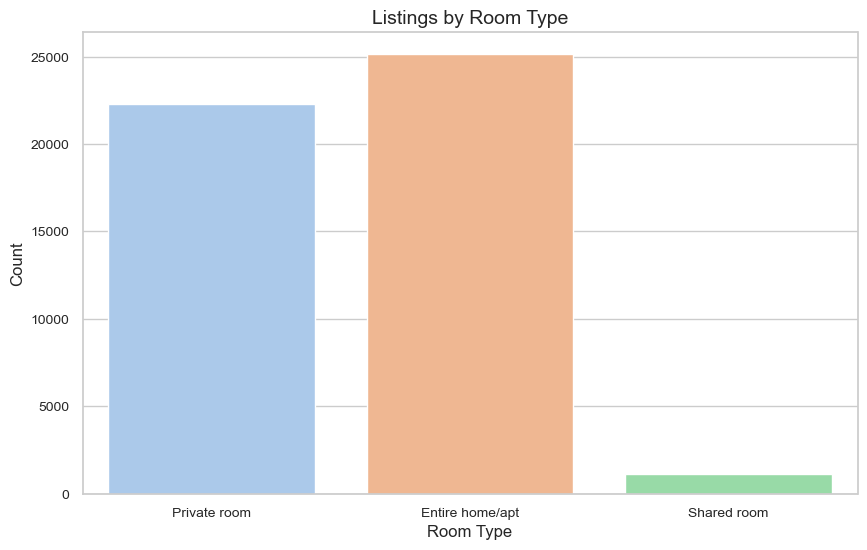

In [14]:
sns.countplot(
    data=data, 
    x='room_type',
    hue='room_type',
    palette='pastel'
)

plt.title('Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Save the plot
plt.savefig('../figures/room_type_distribution.png')
plt.show()

### 5.4 Distribution of Reviews

This histogram shows how frequently listings are reviewed, serving as a proxy for guest activity and engagement. We limit the view to 100 reviews to focus on the majority of listings.

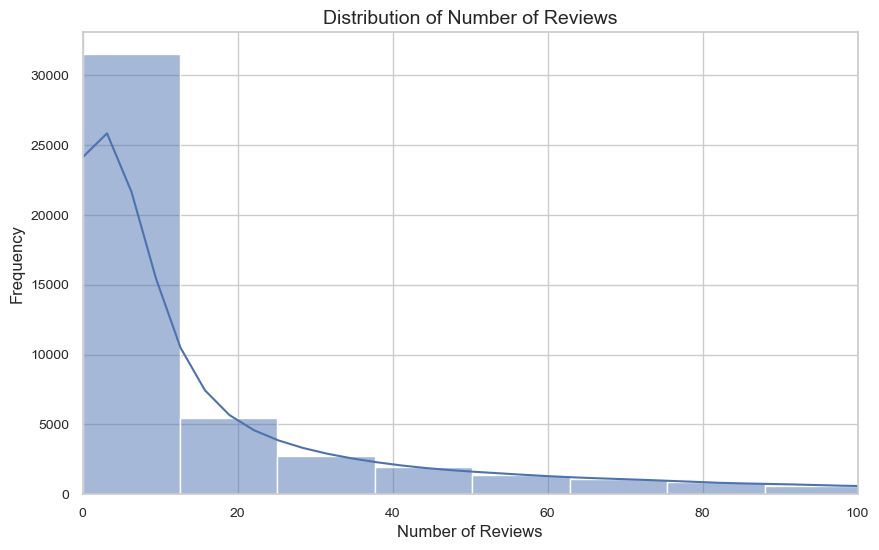

In [15]:
sns.histplot(
    data=data, 
    x='number_of_reviews', 
    bins=50, 
    kde=True
)

plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xlim(0, 100) # Limiting x-axis to see the bulk of data

# Save the plot
plt.savefig('../figures/reviews_distribution.png')
plt.show()

### 5.5 Distribution of Availability

We analyze `availability_365` to see how often listings are available for booking, helping distinguish between occasional rentals and full-time businesses.

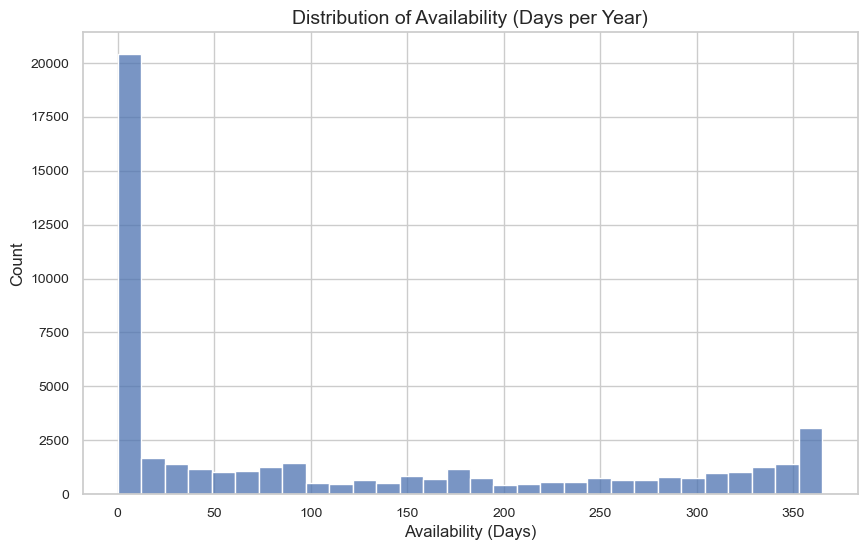

In [16]:
# kde=False because availability days are discrete counts
sns.histplot(data=data, x='availability_365', bins=30, kde=False)

plt.title('Distribution of Availability (Days per Year)')
plt.xlabel('Availability (Days)')
plt.ylabel('Count')

# Save the plot
plt.savefig('../figures/availability_distribution.png')
plt.show()

### 5.6 Minimum Nights Distribution

Illustrates host rules on minimum stay length.  
The plot focuses on values below 30 nights to avoid distortion from extreme values.

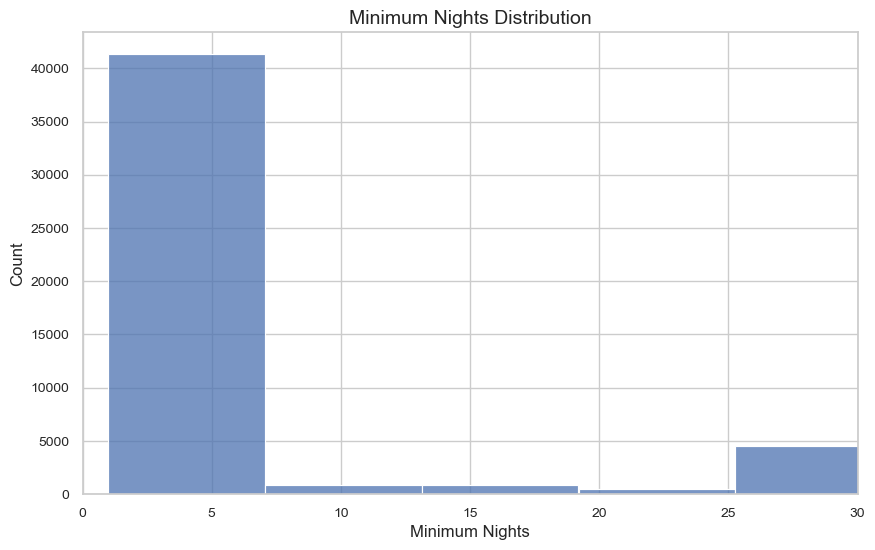

In [17]:
# Limit x-axis to 30 days to clearly see the difference between 
# weekend rentals (2-3 nights) and monthly rentals (30 nights).
sns.histplot(data['minimum_nights'], bins=60, kde=False)

plt.title("Minimum Nights Distribution")
plt.xlabel("Minimum Nights")
plt.ylabel("Count")
plt.xlim(0, 30) 

# Save the plot
plt.savefig('../figures/minimum_nights_distribution.png')
plt.show()

### Summary of Univariate Findings

**Key Observations:**
* **Price:** Prices vary widely, but the vast majority of listings fall below **$500 USD**, with a long tail of luxury options.
* **Room Type:** **Entire homes** and **Private rooms** dominate the NYC market, while **Shared rooms** remain a rare niche.
* **Location:** **Manhattan** and **Brooklyn** accounts for the overwhelming majority of listings, showing where tourism and short-term rentals are concentrated.
* **Stay Duration:** Most hosts allow for **short stays** (under 30 days), catering to tourists and temporary visitors.
* **Availability:** The availability patterns are bimodal, showing a mix of **seasonal/occasional** rentals (0 days available) and **full–year** commercial operations (365 days available).

## 6. Bivariate Analysis

In this section, we explore relationships between key variables to understand what factors influence price and availability. We will examine:
- Price vs. Location, Room Type, Reviews, and Minimum Nights.
- Host behavior and listing availability.

### 6.1 Price Distribution by Neighbourhood Group
We compare the price ranges across the five boroughs using box plots. This helps identify which areas are the most expensive and which have the most price variation.

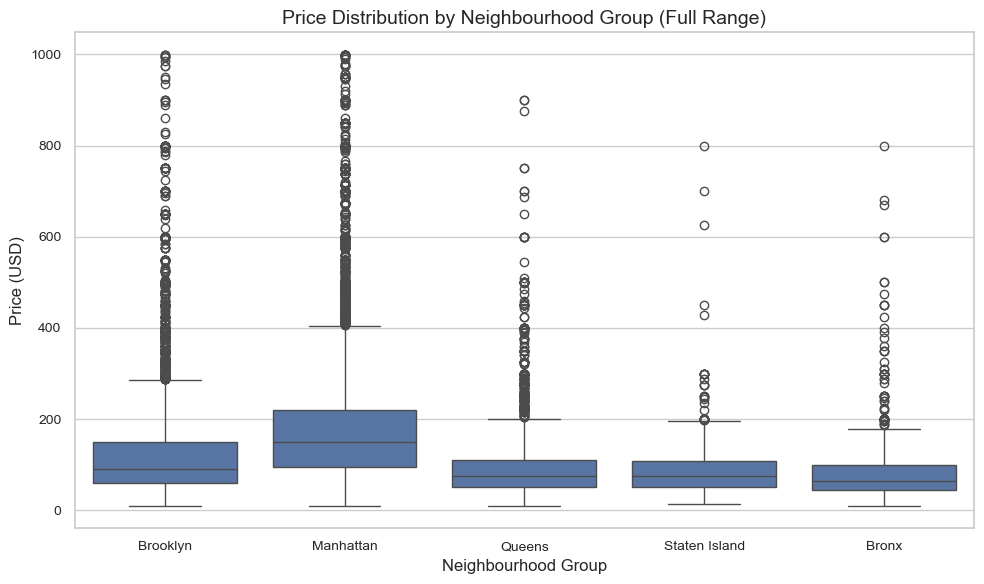

In [18]:
# 6.1(a) Price Distribution by Neighbourhood Group (Full)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="neighbourhood_group", y="price")
plt.title("Price Distribution by Neighbourhood Group (Full Range)")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (USD)")
plt.tight_layout()


plt.savefig("../figures/price_distribution_full.png")
plt.show()

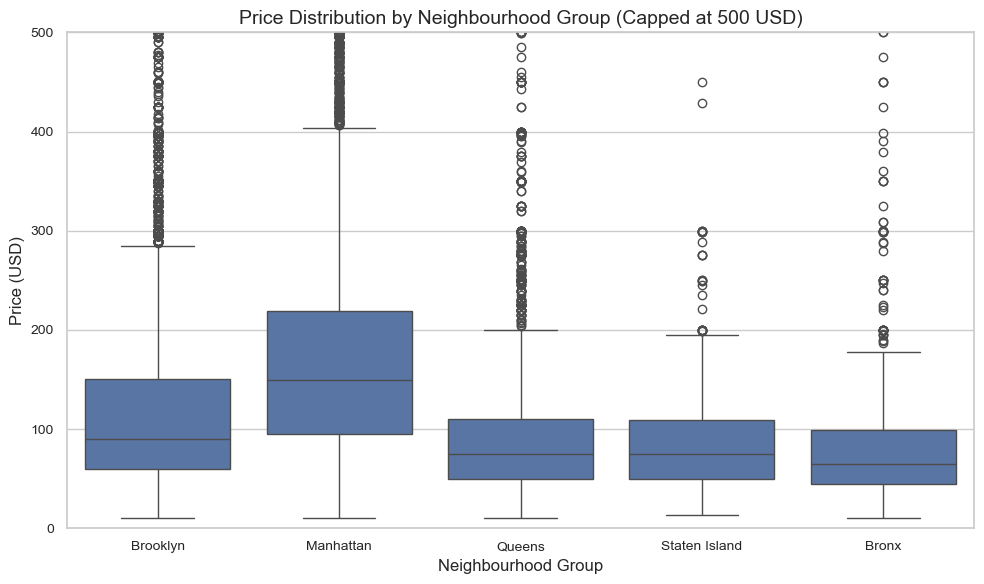

In [19]:
# 6.1(b) Price Distribution by Neighbourhood Group (Capped)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="neighbourhood_group", y="price")
plt.title("Price Distribution by Neighbourhood Group (Capped at 500 USD)")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (USD)")
plt.ylim(0, 500)
plt.tight_layout()


plt.savefig("../figures/price_distribution_capped.png")
plt.show()

The first plot shows the full price range, including extreme outliers up to 10,000 USD.

The second plot caps prices at 500 USD to reveal meaningful differences between boroughs.

This approach provides both an honest distribution and a readable visualization.

### 6.2 Price vs. Number of Reviews
We investigate if there is a correlation between listing price and popularity (review count). Do cheaper listings get more reviews?

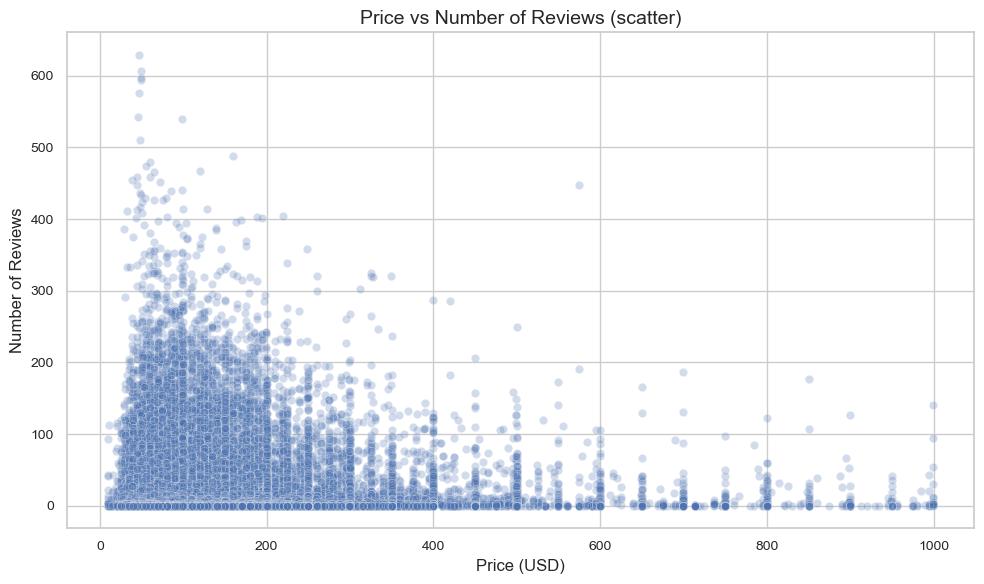

In [20]:
# 6.2 Price vs Number of Reviews - raw scatter
sns.scatterplot(data=data, x='price', y='number_of_reviews', alpha=0.25)
plt.title("Price vs Number of Reviews (scatter)")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Reviews")
plt.tight_layout()

plt.savefig("../figures/price_vs_reviews_scatter.png")
plt.show()

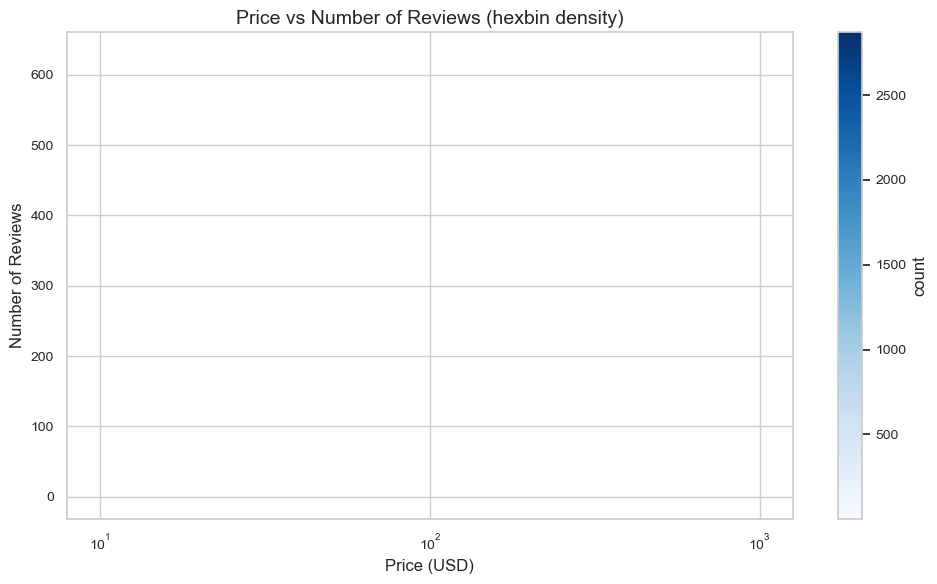

In [21]:
# 6.2b Price vs Number of Reviews - hexbin (density)
plt.figure(figsize=(10, 6))
plt.hexbin(x=data['price'], y=data['number_of_reviews'], gridsize=60, cmap='Blues', mincnt=1)
plt.colorbar(label='count')
plt.title("Price vs Number of Reviews (hexbin density)")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Reviews")
plt.xscale('symlog', linthresh=1)  # optional: show small prices linearly, big prices in log
plt.tight_layout()

plt.savefig("../figures/price_vs_reviews_hexbin.png")
plt.show()

### 6.3 Price vs. Room Type
We analyze how the type of accommodation (Entire home vs. Private/Shared room) dictates the pricing structure.

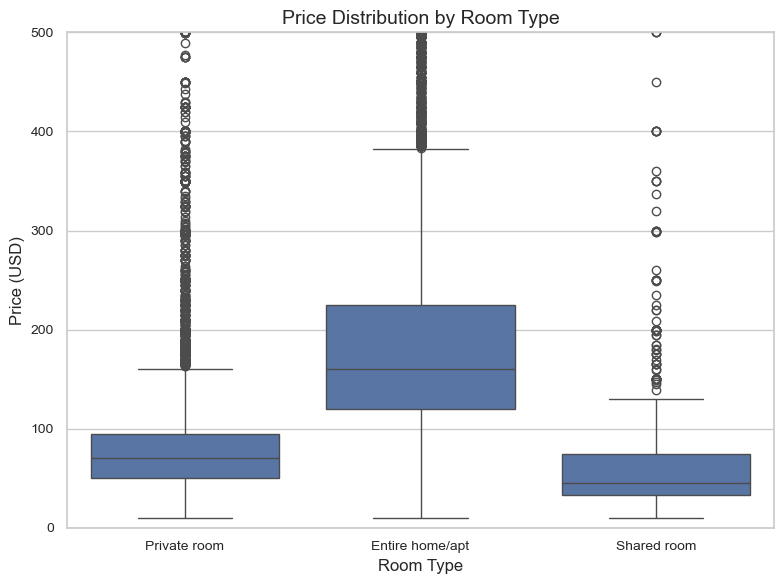

In [22]:
# 6.3 Price vs Room Type
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='room_type', y='price')
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price (USD)")
plt.ylim(0, 500)  # optional cap for readability
plt.tight_layout()


plt.savefig("../figures/price_vs_room_type.png")
plt.show()

### 6.4 Price vs. Minimum Nights
We check if listings with longer minimum stay requirements tend to be priced lower (discounted for long stays) or higher than short-term rentals.

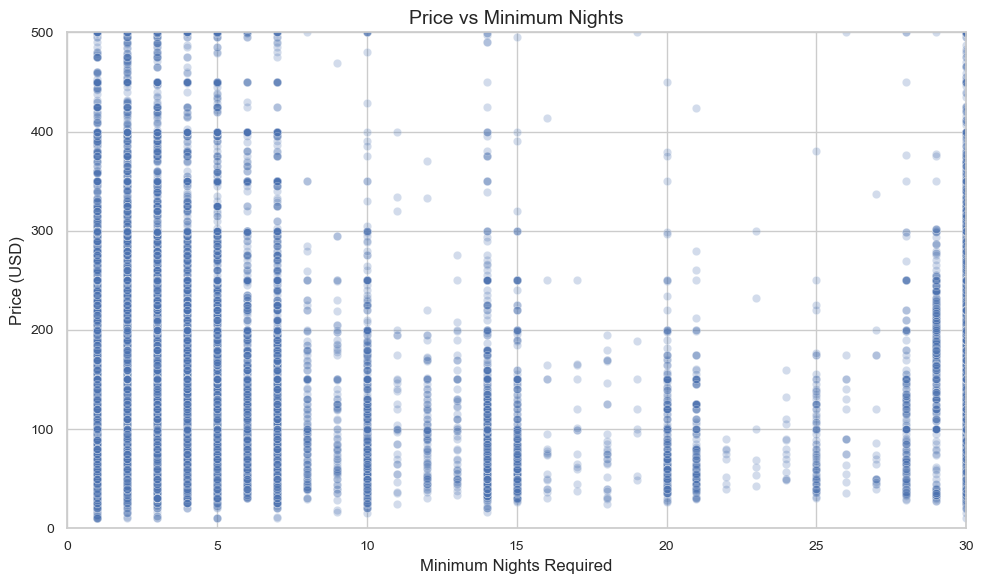

In [23]:
# 6.4 Price vs Minimum Nights
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='minimum_nights',
    y='price',
    alpha=0.25
)
plt.xlim(0, 30)  # focus on realistic range
plt.ylim(0, 500)  # improve readability
plt.title("Price vs Minimum Nights")
plt.xlabel("Minimum Nights Required")
plt.ylabel("Price (USD)")
plt.tight_layout()

plt.savefig("../figures/price_vs_minimum_nights.png")
plt.show()

### 6.5 Availability vs. Price
We look for a relationship between a listing's yearly availability and its price to see if commercial (high availability) listings are priced differently.

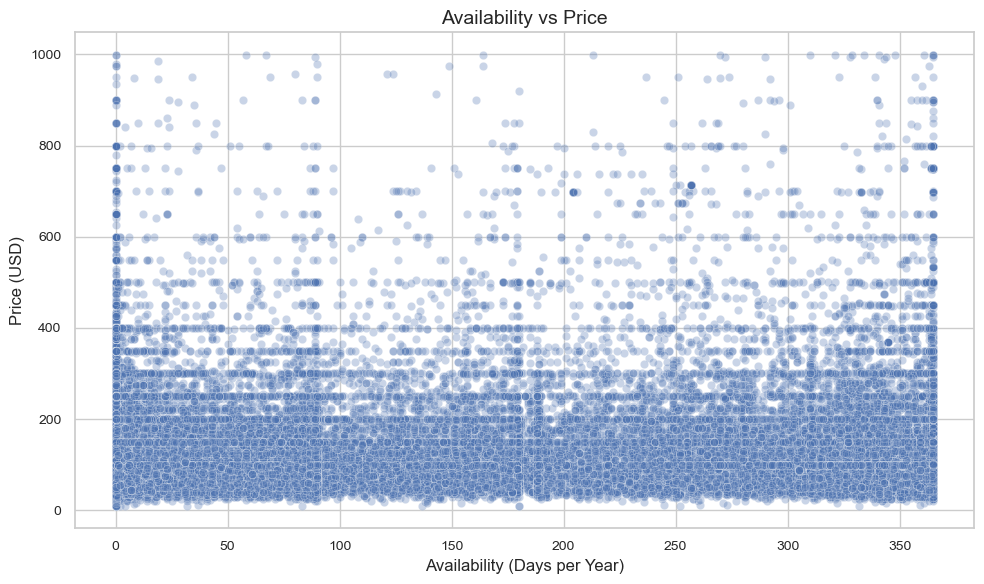

In [24]:
# 6.5 Availability vs Price

sns.scatterplot(
    data=data,
    x='availability_365',
    y='price',
    alpha=0.3
)
plt.title("Availability vs Price")
plt.xlabel("Availability (Days per Year)")
plt.ylabel("Price (USD)")
plt.tight_layout()

plt.savefig("../figures/availability_vs_price.png")
plt.show()

### 6.6 Host Listing Count vs. Number of Reviews
We explore whether "super-hosts" with many listings maintain high engagement per listing, or if single-listing hosts receive more reviews on average.

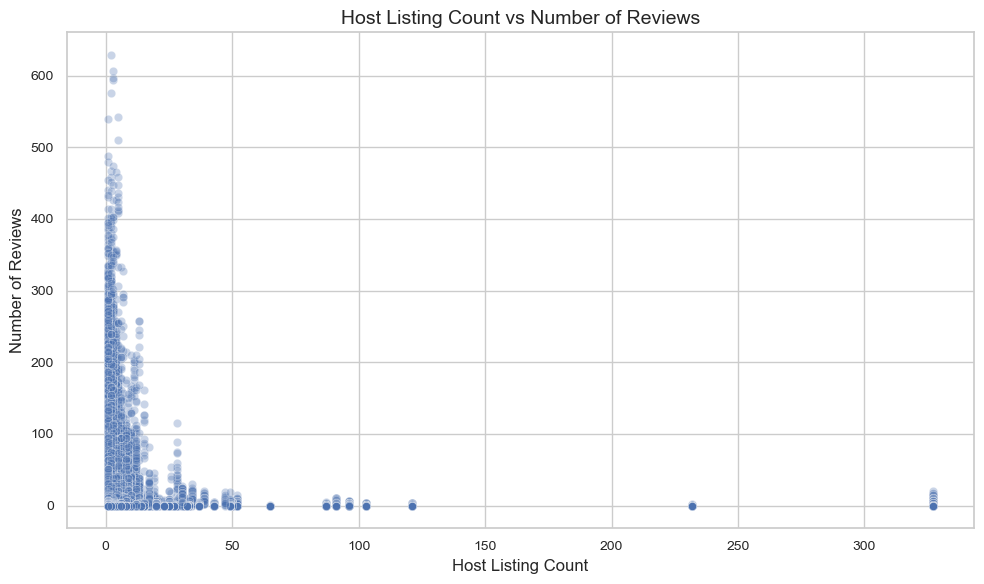

In [25]:
sns.scatterplot(
    data=data,
    x='calculated_host_listings_count',
    y='number_of_reviews',
    alpha=0.3
)
plt.title("Host Listing Count vs Number of Reviews")
plt.xlabel("Host Listing Count")
plt.ylabel("Number of Reviews")
plt.tight_layout()


plt.savefig("../figures/host_listings_vs_reviews.png")
plt.show()

### 6.7 Summary of Bivariate Findings

Our analysis of relationships between variables reveals several key insights:

* **Price Drivers:**
    * **Location:** Manhattan has the highest median prices and price variance.
    * **Room Type:** Entire homes/apartments are significantly more expensive than private or shared rooms.
    * **Availability:** There is no direct linear correlation between availability and price, though commercial listings (available year-round) operate at all price points.

* **Engagement & Reviews:**
    * **Price:** Cheaper listings do not necessarily get more reviews; engagement is spread across the price spectrum.
    * **Host Activity:** Single-listing hosts often achieve higher review counts per listing than multi-listing commercial hosts, suggesting a "quality vs. quantity" trade-off in guest engagement.

* **Stay Duration:**
    * Minimum night requirements do not strongly dictate price, though they effectively segment the market into short-term and long-term rentals.

## 7. Summary & Conclusions

### 7. Summary & Conclusions

This Exploratory Data Analysis of the NYC Airbnb dataset has provided valuable insights into the pricing, availability, and distribution of listings across New York City.

**Key Findings:**

1.  **Price Distribution:**
    * Rental prices are highly right-skewed, with the majority of listings falling below $200 per night.
    * There is a long tail of high-end luxury listings, necessitating the removal of extreme outliers for clearer visualization.

2.  **Location Trends:**
    * **Manhattan** is the most expensive borough, with the highest median price and the greatest density of listings.
    * **Brooklyn** offers a mid-range alternative with high availability, while Queens, Bronx, and Staten Island are significantly more affordable but have fewer listings.

3.  **Room Type Dynamics:**
    * **Entire homes/apartments** command the highest prices.
    * **Private rooms** are the most common budget-friendly option.
    * **Shared rooms** are the cheapest but least common.

4.  **Host Behavior:**
    * Most hosts manage only a single listing, suggesting a marketplace dominated by individuals rather than large commercial operators.
    * "Super-hosts" or those with many listings tend to have lower review counts per listing, potentially indicating less personalized engagement compared to single-listing hosts.

5.  **Availability & Pricing:**
    * There is **no strong linear correlation** between availability and price.
    * Listings show a bimodal availability pattern: many are available for 0 days (inactive/booked) or nearly 365 days (dedicated rentals), with prices varying widely within both groups.

**Conclusion:**
The NYC Airbnb market is diverse, ranging from budget-friendly private rooms in outer boroughs to high-end full apartments in Manhattan. While location and room type are strong predictors of price, availability and host listing count show more complex, non-linear relationships with pricing and engagement.